In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import folium.plugins

### Pepreparing data

In [2]:
terror=pd.read_excel('gtd_Pakistan.xlsx')
terror.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197011010001,1970,11,1,NaN,0,NaT,153,Pakistan,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1,197402020001,1974,2,2,NaN,1,1974-02-03,153,Pakistan,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2,197412090001,1974,12,9,NaN,0,NaT,153,Pakistan,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terror=terror[['iyear','imonth','iday','city','latitude','longitude','target1','targtype1_txt',
               'nkill','nwound','summary','gname','attacktype1_txt','weaptype1_txt','motive']]
terror.rename(columns={'iyear':'year','imonth':'month','iday':'day','attacktype1_txt':'attack_type',
                       'target1':'target','nkill':'killed','nwound':'wounded','gname':'group',
                       'targtype1_txt':'target_type','weaptype1_txt':'weapon_type'},inplace=True)
terror.isnull().sum()

year              0
month             0
day               0
city             11
latitude         49
longitude        49
target           20
target_type       0
killed          258
wounded         484
summary        1741
group             0
attack_type       0
weapon_type       0
motive         9717
dtype: int64

In [4]:
terror['killed'] = terror['killed'].fillna(0).astype(int)
terror['wounded'] = terror['wounded'].fillna(0).astype(int)
terror['casualities']=terror['killed']+terror['wounded']
terror['date'] = pd.to_datetime(terror[['year','month', 'day']], errors='ignore')
terror.head(3)

,year,month,day,city,latitude,longitude,target,target_type,killed,wounded,summary,group,attack_type,weapon_type,motive,casualities,date
0,1970,11,1,Karachi,24.891115,67.143311,Deputy Foreign Minister: Zygfryd Wolniak,Government (Diplomatic),4,20,NaN,Unknown,Assassination,Vehicle (not to include vehicle-borne explosiv...,NaN,24,19701101
1,1974,2,2,Karachi,24.891115,67.143311,Greek Freighter in Karachi,Maritime,0,0,NaN,Muslim Guerrillas,Bombing/Explosion,Firearms,NaN,0,19740202
2,1974,12,9,Peshawar,34.006004,71.537430,USIS Center,Government (Diplomatic),0,2,NaN,Unknown,Bombing/Explosion,Explosives,NaN,2,19741209


### Terrorism by time

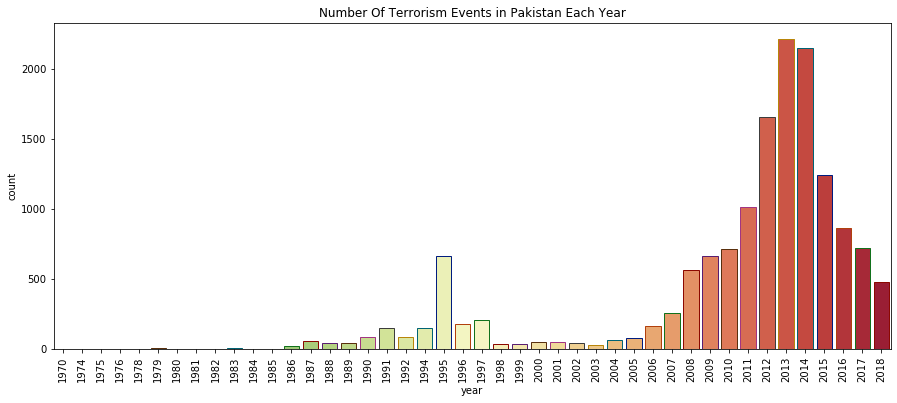

In [5]:
plt.subplots(figsize=(15,6))
sns.countplot('year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorism Events in Pakistan Each Year')
plt.show()

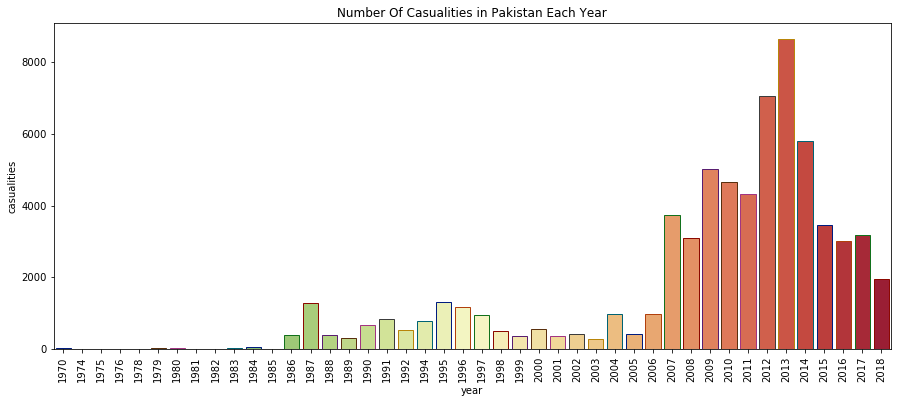

In [6]:
plt.subplots(figsize=(15,6))
year_cas = terror.groupby('year').casualities.sum().to_frame().reset_index()
year_cas.columns = ['year','casualities']
sns.barplot(x=year_cas.year, y=year_cas.casualities, palette='RdYlGn_r',
            edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities in Pakistan Each Year')
plt.show()

### Terrorism by city

In [7]:
city_attacks=terror.city.value_counts().to_frame().reset_index()
city_attacks.columns = ['city', 'attacks']
city_cas = terror.groupby('city').casualities.sum().to_frame().reset_index()
city_cas.columns = ['city', 'casualities']
city_tot = pd.merge(city_attacks, city_cas, how='left', on='city').sort_values('casualities',ascending=False)[:15]
city_tot

,city,attacks,casualities
0,Karachi,2672,9429
1,Quetta,848,5833
2,Peshawar,829,5691
3,Lahore,235,4082
7,Islamabad,150,2213
59,Parachinar,39,1982
17,Rawalpindi,114,1352
11,Dera Ismail Khan,137,1042
4,Jamrud,160,908
31,Charsadda,71,738


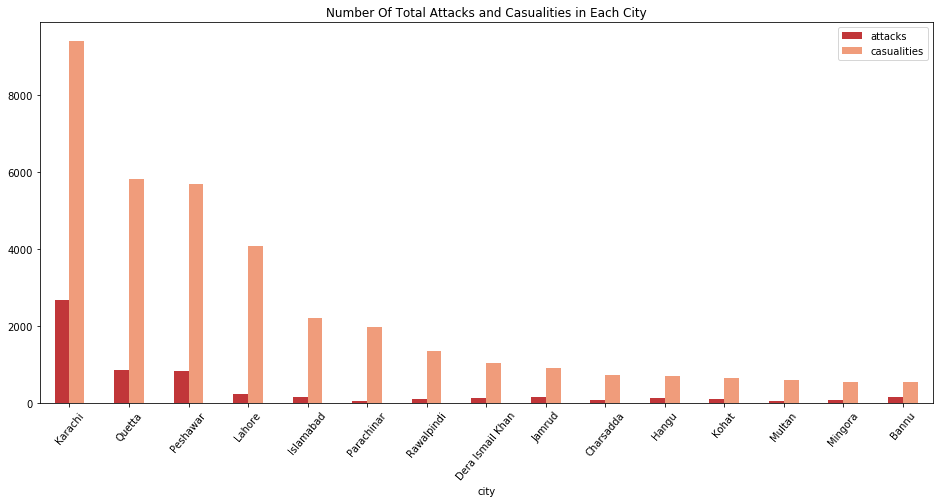

In [8]:
sns.set_palette('RdBu')
city_tot.plot.bar(x='city', width=0.5)
plt.xticks(rotation=50)
plt.title('Number Of Total Attacks and Casualities in Each City')
fig = plt.gcf()
fig.set_size_inches(16,7)
plt.xticks(rotation=50)
plt.show()

### Terrorism by group

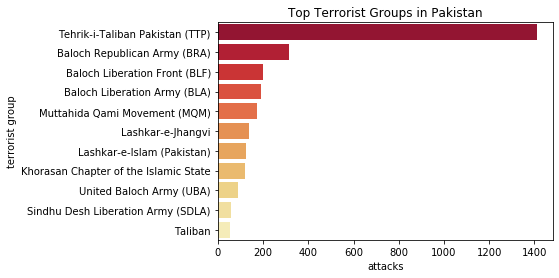

In [9]:
groups=terror['group'].value_counts().to_frame().drop('Unknown').reset_index()[:11]
groups.columns = ['terrorist group', 'attacks']
sns.barplot(y=groups['terrorist group'],x=groups['attacks'],palette='YlOrRd_r')
plt.title('Top Terrorist Groups in Pakistan')
plt.show()

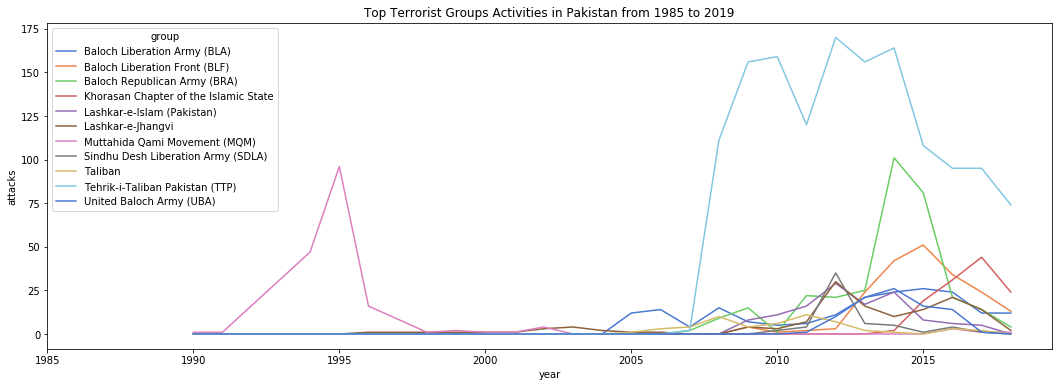

In [10]:
terror_groups=terror[terror['group'].isin(groups['terrorist group'])]
pd.crosstab(terror_groups.year, terror_groups.group).plot(color=sns.color_palette('muted'))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1985, 2020, 5))
plt.ylabel('attacks')
plt.title('Top Terrorist Groups Activities in Pakistan from 1985 to 2019')
plt.show()

### Terrorism by type

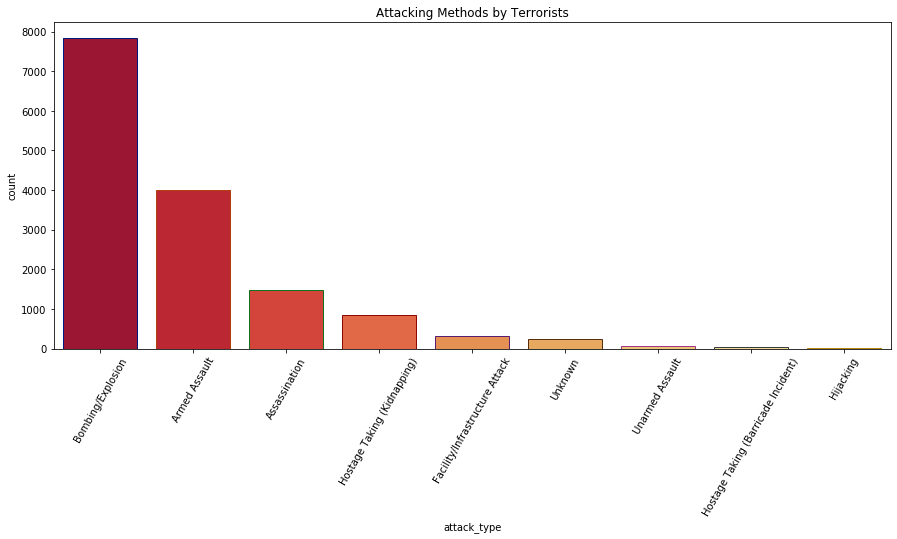

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot('attack_type',data=terror,palette='YlOrRd_r',edgecolor=sns.color_palette('dark', 10),order=terror['attack_type'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Attacking Methods by Terrorists')
plt.show()

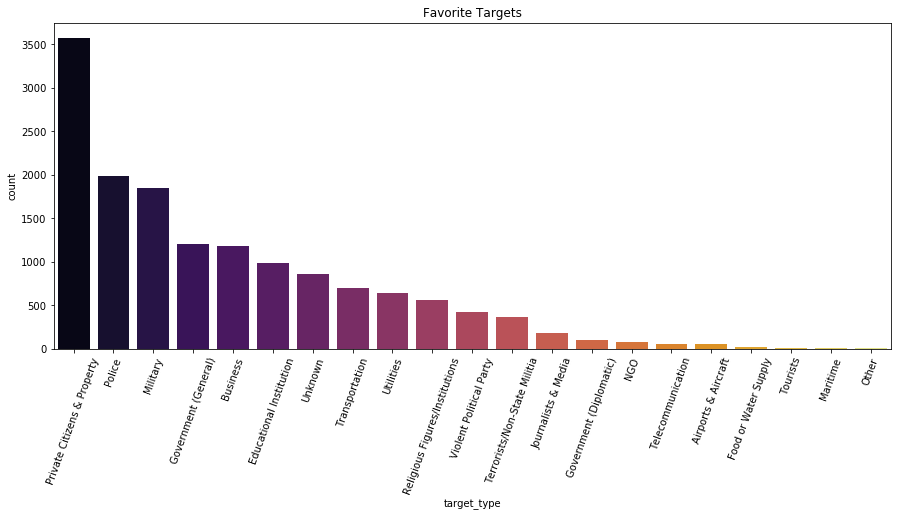

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['target_type'],palette='inferno',order=terror['target_type'].value_counts().index)
plt.xticks(rotation=70)
plt.title('Favorite Targets')
plt.show()

### Motive behind

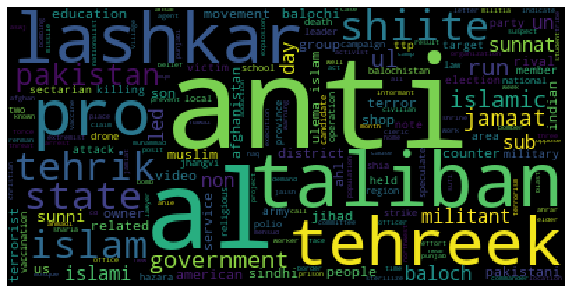

In [13]:
import nltk
from wordcloud import WordCloud, STOPWORDS
motive=terror['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
customswords='although specific motive unknown however , officials authorities state believe sources describe related .'
stopwords.extend(customswords.split())
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

### Heatmap with time

In [14]:
terror_fol=terror.copy()
terror_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_fol=terror_fol[['latitude','longitude']].groupby(terror_fol['year'])
location_fol=dict(list(location_fol))
years,locs=[],[]
for year,loc in location_fol.items():
    years.append(year)
    locs.append(loc.values.tolist())
hmt = folium.plugins.HeatMapWithTime(locs, years,radius=5)
hmap = folium.Map([28.5,71],tiles='http://cache1.arcgisonline.cn/arcgis/rest/services/ChinaOnlineStreetPurplishBlue/MapServer/tile/{z}/{y}/{x}/',
               attr='ArcGIS Online Basemap',zoom_start=5)
hmt.add_to(hmap)
hmap